In [47]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets 
from sklearn import neighbors
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

In [48]:
# load iris dataset 
iris = datasets.load_iris()
# Inputs 
X = iris.data
Y = iris.target
# Labels: 
# 0: Setosa 
# 1: Versicolor
# 2: Virginica 
# Features: 
# Sepal length, Sepal width, Petal length, Petal width

In [65]:
# Fit KNN model with first two features
numNeighs = 2
clf = neighbors.KNeighborsClassifier(numNeighs)
clf.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [45]:
# Visualize decision boundaries
# Project 4D data-points onto 2D with PCA 
# Fit PCA model with X 
pca = PCA(n_components=2)
pca.fit(X)
X2D = pca.transform(X)

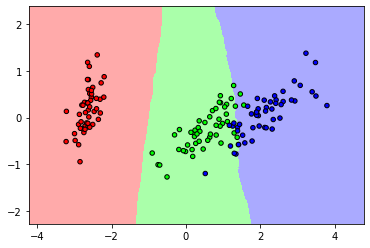

In [46]:
# Define plot range 
plotXMin, plotXMax, plotYMin, plotYMax =\
    X2D[:,0].min() - 1,\
    X2D[:,0].max() + 1,\
    X2D[:,1].min() - 1,\
    X2D[:,1].max() + 1
# Define plot step-size
step = 0.01
plotXs, plotYs = np.meshgrid(np.arange(plotXMin, plotXMax, step),\
                            np.arange(plotYMin, plotYMax, step))
# Transform back to original space 
# For predictions
predictions = clf.predict(pca.inverse_transform(np.c_[plotXs.ravel(), plotYs.ravel()]))
predictions = predictions.reshape(plotXs.shape)
# Define color maps for plot 
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
# Plot decision boundaries
plt.figure()
plt.pcolormesh(plotXs, plotYs, predictions, cmap=cmap_light)
# Plot training points 
plt.scatter(X2D[:,0], X2D[:,1], c=Y, cmap=cmap_bold,\
            edgecolor='k', s=20)

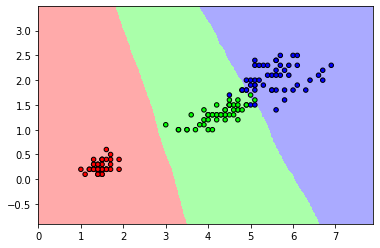

In [74]:
# Decision boundaries of classification 
# based on sepal/petal characteristics only
X2 = X[:,2:4]
numNeighs = 50
clf = neighbors.KNeighborsClassifier(numNeighs)
clf.fit(X2,Y) # Fit KNN model

# Define plot range 
plotXMin, plotXMax, plotYMin, plotYMax =\
    X2[:,0].min() - 1,\
    X2[:,0].max() + 1,\
    X2[:,1].min() - 1,\
    X2[:,1].max() + 1
# Define plot step-size
step = 0.01
plotXs, plotYs = np.meshgrid(np.arange(plotXMin, plotXMax, step),\
                            np.arange(plotYMin, plotYMax, step))
# Transform back to original space 
# For predictions
predictions = clf.predict(np.c_[plotXs.ravel(), plotYs.ravel()])
predictions = predictions.reshape(plotXs.shape)
# Define color maps for plot 
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
# Plot decision boundaries
plt.figure()
plt.pcolormesh(plotXs, plotYs, predictions, cmap=cmap_light)
# Plot training points 
plt.scatter(X2[:,0], X2[:,1], c=Y, cmap=cmap_bold,\
            edgecolor='k', s=20)

In [138]:
# TODO: Analysis of effect of k on decision boundaries 